In [1]:
import networks
import torch

from PIL import Image
import os

import torchvision.transforms as transforms

import numpy as np

In [2]:
net_G_path=r'C:\Users\appel\Documents\Project\image-synthesis\checkpoints\fake2real_448\latest_net_G_A.pth'
netG_B = networks.define_G(3, 3, 16, 'resnet_9blocks', 'instance', False, 'normal', 0.02)

load_path = net_G_path
device = torch.device('cuda:{}'.format(0))
state_dict = torch.load(load_path, map_location=str(device))
netG_B.load_state_dict(state_dict)
netG_B.eval()

initialize network with normal


ResnetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 16, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResnetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
        (5): 

In [3]:
root = r'C:\Users\appel\Documents\Project\simulation-synthesis\output\448\labeled_fake_aug'
images = os.listdir(root)

In [4]:
t = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) 

In [8]:
for im in images:
    img = Image.open(os.path.join(root, im))
    if 'img' in im:
        imtensor = t(torch.Tensor(np.array(img)).permute(2,0,1).unsqueeze(0)/255)
        img = netG_B(imtensor)
        arr = (((img+1)/2)*255).squeeze(0).permute(1,2,0).detach().numpy().astype(np.uint8)
        Image.fromarray(arr).save(os.path.join(root, im))
        

KeyboardInterrupt: 

In [12]:
arr.shape

(448, 608, 3)

In [37]:
arr.shape

(448, 608, 3)

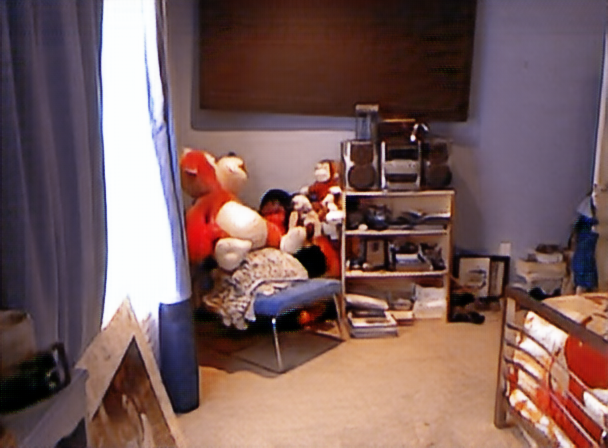